<a href="https://colab.research.google.com/github/vs-06/ML-Bootcamp/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('magic04.data', names=["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"])
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


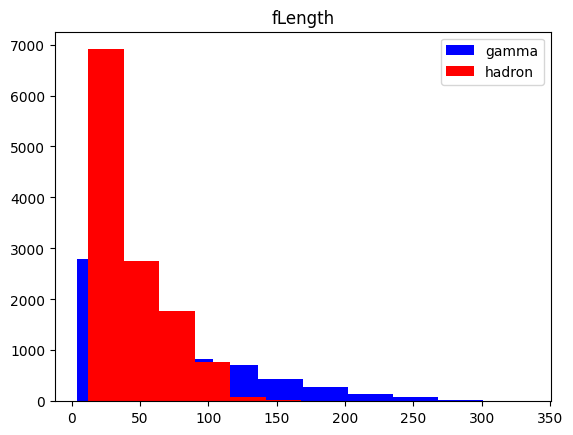

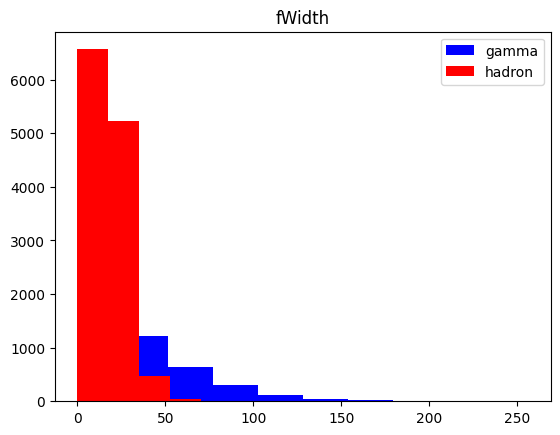

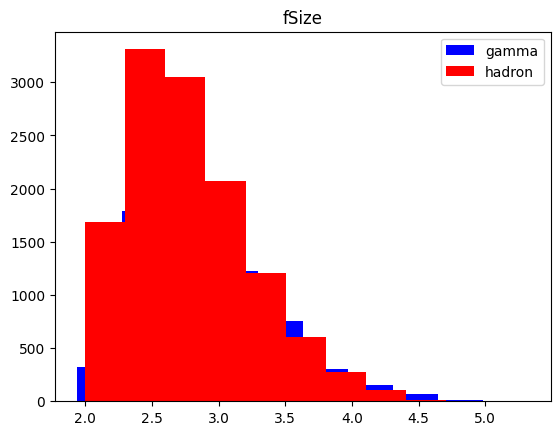

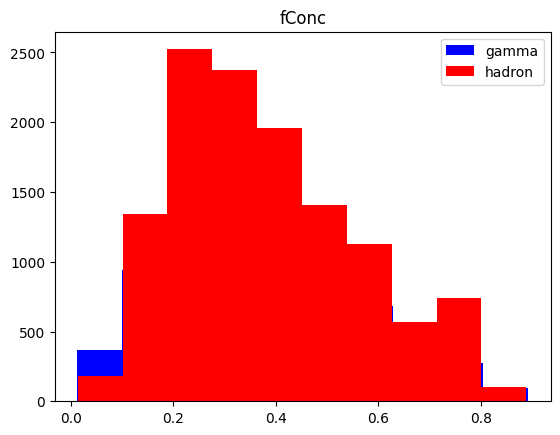

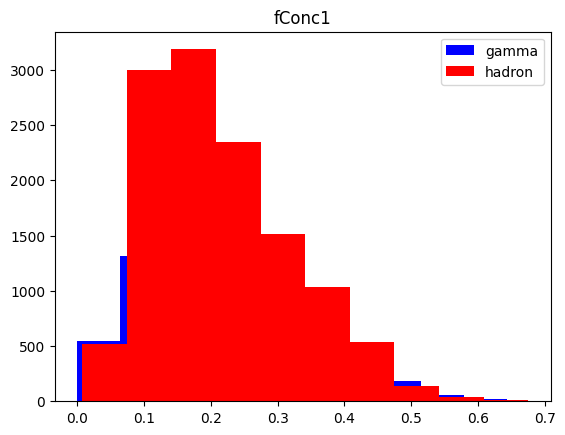

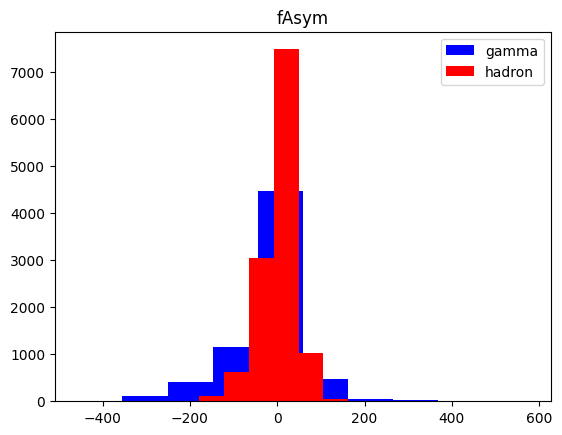

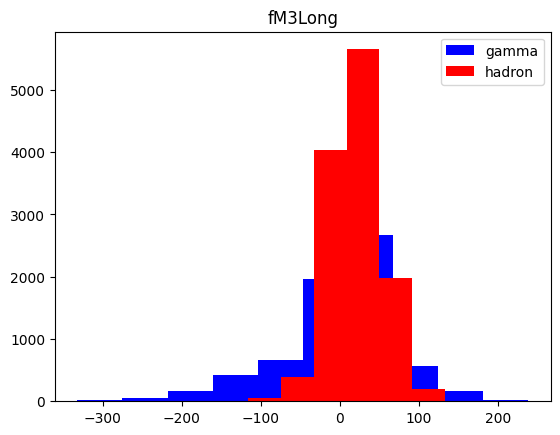

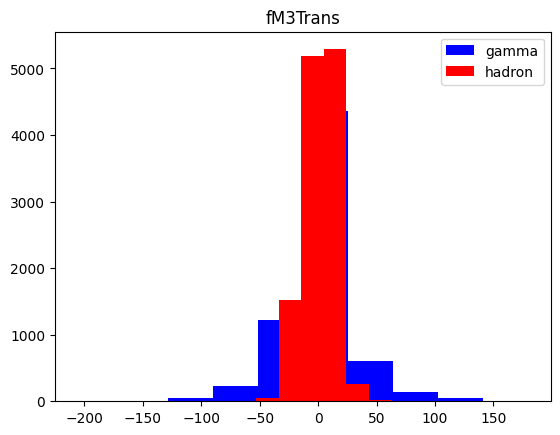

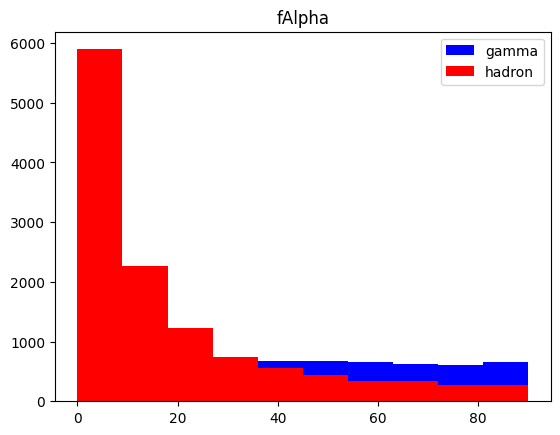

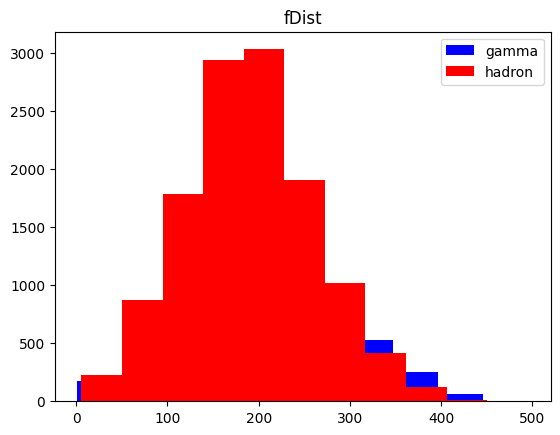

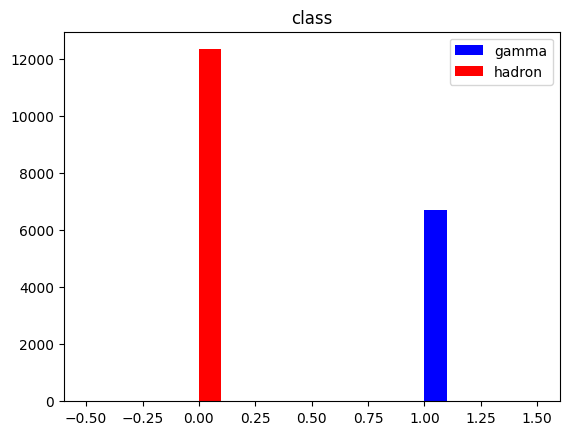

In [27]:
df['class'] = df['class'].replace({'g': 0, 'h': 1})
df.head()
for col in df.columns:
  plt.hist(df[df['class']== 1][col], color= 'blue', label='gamma')
  plt.hist(df[df['class']==0][col], color= 'red', label='hadron')
  plt.title(col)
  plt.legend()
  plt.show()

# Traing and Test Data Sets

In [38]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Scaling Dataset
## To ensure data in all columns is with in the same scale range for proper results

In [45]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  # using the built in Scaler function by importing it from sklearn
  scaler = StandardScaler()
  # Scaling input column values, we do not have to scale the output values.
  X = scaler.fit_transform(X)

  # OVERSAMPLING
  if oversample:
    ros = RandomOverSampler() # Automatically oversamples the less class data.
    X, y = ros.fit_resample(X, y)


  # horizantally stacking the scaled input and output columns. We have to convert the output vector to a 2x2 matrix in order to stack without errors, as the input a 2x2 matrix.
  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y


In [49]:
train_data, x_train, y_train = scale_dataset(train, oversample=True)
valid_data, x_valid, y_valid = scale_dataset(valid, oversample=True)
test_data, x_test, y_test = scale_dataset(test, oversample=True)
print(len(train_data))
print(len(valid_data))
print(len(test_data))
print(sum(y_train == 1)) # Less samples compared to y_train==0(when oversample = False), so we have to oversample it.
print(sum(y_train == 0))

14800
4968
4896
7400
7400
